# **Import Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold

# **Loadding dataset**

In [ ]:
dataset = pd.read_csv('/content/kidney_disease.csv') 

In [ ]:
dataset.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
dataset.tail() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
dataset.shape 

(400, 26)

In [ ]:
dataset.describe() 

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# **Preprocessing:**

In [ ]:
dataset.drop('id', axis = 1, inplace = True)

In [ ]:
# rename column names to make it more user-friendly
dataset.columns = ['age',
                'blood_pressure',
                'specific_gravity',
                'albumin',
                'sugar',
                'red_blood_cells',
                'pus_cell',
                'pus_cell_clumps',
                'bacteria',
                'blood_glucose_random',
                'blood_urea',
                'serum_creatinine',
                'sodium',
                'potassium',
                'haemoglobin',
                'packed_cell_volume',
                'white_blood_cell_count',
                'red_blood_cell_count',
                'hypertension',
                'diabetes_mellitus',
                'coronary_artery_disease',
                'appetite',
                'peda_edema',
                'aanemia',
                'class'
               ]

In [ ]:
dataset.drop(['appetite','peda_edema','aanemia','serum_creatinine','serum_creatinine',], axis=1,inplace = True)

In [ ]:
dataset.shape

(400, 21)

In [ ]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,NaN,NaN,11.3,38,6000,NaN,no,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,NaN,NaN,9.6,31,7500,NaN,no,yes,no,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,111.0,2.5,11.2,32,6700,3.9,yes,no,no,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,NaN,NaN,11.6,35,7300,4.6,no,no,no,ckd


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  sodium                   313 non-null    float64
 12  potassium                312 non-null    float64
 13  haemoglobin              348 non-null    float64
 14  packed_cell_volume       3

In [ ]:
# Extracting categorical and numerical columns
cat_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
num_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']

In [ ]:
# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {dataset[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '

In [ ]:
# replace incorrect values
dataset['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
dataset['coronary_artery_disease'].replace(to_replace ={'\tno':'no'},inplace=True)
dataset['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'},inplace=True)

In [ ]:
dataset['class'] = dataset['class'].map({'ckd': 0, 'not ckd': 1})
dataset['class'] = pd.to_numeric(dataset['class'], errors='coerce')

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {dataset[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [ ]:
dataset.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'sodium', 'potassium',
       'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'class'],
      dtype='object')

In [ ]:
# checking for null values
dataset.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
class                        0
dtype: int64

In [ ]:
dataset[num_cols].isnull().sum()

age                      9
blood_pressure          12
specific_gravity        47
albumin                 46
sugar                   49
blood_glucose_random    44
blood_urea              19
sodium                  87
potassium               88
haemoglobin             52
dtype: int64

In [ ]:
dataset[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
class                        0
dtype: int64

In [ ]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample       = dataset[feature].dropna().sample(dataset[feature].isna().sum())
    random_sample.index = dataset[dataset[feature].isnull()].index
    dataset.loc[dataset[feature].isnull(), feature] = random_sample

# methos 2    
def impute_mode(feature):
    mode = dataset[feature].mode()[0]
    dataset[feature] = dataset[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
dataset[num_cols].isnull().sum()

age                     0
blood_pressure          0
specific_gravity        0
albumin                 0
sugar                   0
blood_glucose_random    0
blood_urea              0
sodium                  0
potassium               0
haemoglobin             0
dtype: int64

In [ ]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [ ]:
dataset[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
class                      0
dtype: int64

In [ ]:
for col in cat_cols:
    print(f"{col} has {dataset[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

packed_cell_volume has 44 categories

white_blood_cell_count has 92 categories

red_blood_cell_count has 49 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

class has 2 categories



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    dataset[col] = le.fit_transform(dataset[col])

In [ ]:
dataset.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int64
pus_cell                     int64
pus_cell_clumps              int64
bacteria                     int64
blood_glucose_random       float64
blood_urea                 float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume           int64
white_blood_cell_count       int64
red_blood_cell_count         int64
hypertension                 int64
diabetes_mellitus            int64
coronary_artery_disease      int64
class                        int64
dtype: object

In [ ]:
ind_col = [col for col in dataset.columns if col != 'class']
dep_col = 'class'

X = dataset[ind_col]
Y = dataset[dep_col]

In [ ]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state = 0)

# **MOdel**

In [ ]:
from keras.api._v2.keras import activations
model=Sequential()
model.add( Dense(256 , input_dim=len(X.columns) , activation='relu' ))
model.add( Dense(1,activation='sigmoid') )

In [ ]:
#compile

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [ ]:
#train model

history= model.fit(x_train,y_train,epochs=150,batch_size=x_train.shape[0])


Epoch 1/150
1/1 [==============================] - 1s 757ms/step - loss: 1.1943 - accuracy: 0.5857
Epoch 2/150
1/1 [==============================] - 0s 14ms/step - loss: 2.4038 - accuracy: 0.4571
Epoch 3/150
1/1 [==============================] - 0s 11ms/step - loss: 0.9174 - accuracy: 0.6107
Epoch 4/150
1/1 [==============================] - 0s 13ms/step - loss: 0.9414 - accuracy: 0.6357
Epoch 5/150
1/1 [==============================] - 0s 12ms/step - loss: 1.3014 - accuracy: 0.6321
Epoch 6/150
1/1 [==============================] - 0s 12ms/step - loss: 1.0887 - accuracy: 0.6500
Epoch 7/150
1/1 [==============================] - 0s 16ms/step - loss: 0.6212 - accuracy: 0.7179
Epoch 8/150
1/1 [==============================] - 0s 10ms/step - loss: 0.4707 - accuracy: 0.7464
Epoch 9/150
1/1 [==============================] - 0s 13ms/step - loss: 0.6906 - accuracy: 0.7429
Epoch 10/150
1/1 [==============================] - 0s 12ms/step - loss: 0.7805 - accuracy: 0.7286
Epoch 11/150
1/1 [

Text(0.5, 0, 'epoch')

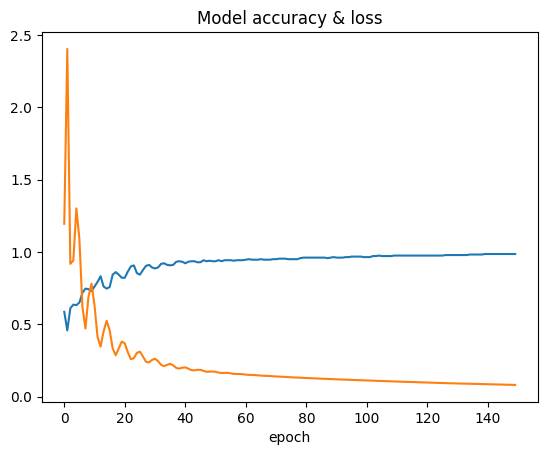

In [ ]:
#model loss
plt.plot(history.history['accuracy'])

plt.plot(history.history['loss'])

plt.title('Model accuracy & loss')
plt.xlabel('epoch')

In [ ]:
print('shape of training data: ', x_train.shape)
print('shape of testing data: ', x_test.shape)

shape of training data:  (280, 20)
shape of testing data:  (120, 20)


In [ ]:
dataset.shape

(400, 21)

In [ ]:
pred=model.predict(x_test)
pred=[1 if y>=0.5 else 0 for y in pred]
pred


print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))
print('original  : {0}'.format(", ".join(str(x) for x in y_test)))


4/4 [==============================] - 0s 3ms/step
Predicted : 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1
original  : 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1


In [ ]:
import pickle

In [ ]:
filename = 'kidney_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('kidney_model.sav', 'rb'))

In [ ]:
dataset.shape

(400, 21)

In [ ]:
dataset.tail()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,class
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,150.0,4.9,15.7,35,62,30,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,141.0,3.5,16.5,42,72,44,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,137.0,4.4,15.8,37,61,36,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,135.0,4.9,14.2,39,67,41,0,0,0,1
399,58.0,80.0,1.025,0.0,0.0,1,1,0,0,131.0,...,141.0,3.5,15.8,41,63,43,0,0,0,1


In [ ]:
input_data = (397,	12.0,	80.0,	1.020,	0.0,	0.0,	1,	1,	0,	0,	100.0,	137.0,	4.4,	15.8,	37,	61,	36,	0,	0,	0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] <0.5):
  print('The person is not any kidney problem')
else:
  print('The person has kidney problem')

1/1 [==============================] - 0s 64ms/step
[[7.540234e-13]]
The person is not any kidney problem
